# Librerias

In [1]:
library(dplyr)
library(readstata13)
library(stargazer)
library(ggplot2)
#library(lm_robust)
library(robust)
library(MASS)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Loading required package: fit.models


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




In [2]:
output           = "C:/Users/et396/Dropbox/Docencia/Educate/Econometria/S1/Data"
setwd(output)
base = read.dta13("Mincer_2021.dta")

# Question 1

In [3]:
base %>% dim()

[1] 24774    17

In [4]:
base %>% names()

[1] "index"        "rcod_persona" "rcod_hogar"   "rmujer"       "r6"          
 [6] "lnr6"         "rmu"          "rneduca"      "r3"           "redad"       
[11] "redadsq"      "rDpto"        "rpareja"      "reduca"       "rpobre"      
[16] "rmiembro"     "rgasto"

In [5]:
base %>% summary()
base <- base %>% mutate(rdpto = factor(rDpto) )

     index       rcod_persona        rcod_hogar            rmujer      
 Min.   :    0   Length:24774       Length:24774       Min.   :0.0000  
 1st Qu.: 7223   Class :character   Class :character   1st Qu.:0.0000  
 Median :14584   Mode  :character   Mode  :character   Median :0.0000  
 Mean   :14364                                         Mean   :0.2831  
 3rd Qu.:21431                                         3rd Qu.:1.0000  
 Max.   :28333                                         Max.   :1.0000  
       r6             lnr6             rmu          rneduca            r3   
 Min.   :    0   Min.   : 0.000   Min.   :0   inicial   :   13   Min.   :1  
 1st Qu.:  495   1st Qu.: 6.205   1st Qu.:0   primaria  : 7731   1st Qu.:1  
 Median :  996   Median : 6.904   Median :0   secundaria:10389   Median :1  
 Mean   : 1444   Mean   : 6.710   Mean   :0   tecnica   : 3273   Mean   :1  
 3rd Qu.: 1762   3rd Qu.: 7.474   3rd Qu.:0   Univ.     : 3368   3rd Qu.:1  
 Max.   :52063   Max.   :10.860   

In [6]:
m1 <- lm(lnr6 ~ reduca, data = base)
m2 <- lm(lnr6 ~ reduca + rmujer + redad + redadsq + rpareja, data = base)
m3 <- lm(lnr6 ~ reduca + rmujer + redad + redadsq + rpareja + rdpto, data = base)

stargazer(m1, m2, m3, title="Results", type="text")



Results
                                                    Dependent variable:                                
                    -----------------------------------------------------------------------------------
                                                           lnr6                                        
                                (1)                         (2)                         (3)            
-------------------------------------------------------------------------------------------------------
reduca                        0.072***                    0.071***                   0.066***          
                              (0.001)                     (0.001)                     (0.002)          
                                                                                                       
rmujer                                                   -0.560***                   -0.556***         
                                                       

In [7]:
stargazer(m1, m2, m3, title="Results", type="text", keep = c("reduca", "rmujer"))


Results
                                                    Dependent variable:                                
                    -----------------------------------------------------------------------------------
                                                           lnr6                                        
                                (1)                         (2)                         (3)            
-------------------------------------------------------------------------------------------------------
reduca                        0.072***                    0.071***                   0.066***          
                              (0.001)                     (0.001)                     (0.002)          
                                                                                                       
rmujer                                                   -0.560***                   -0.556***         
                                                       

Warning message in geom_boxplot(outliers = FALSE):
"Ignoring unknown parameters: `outliers`"


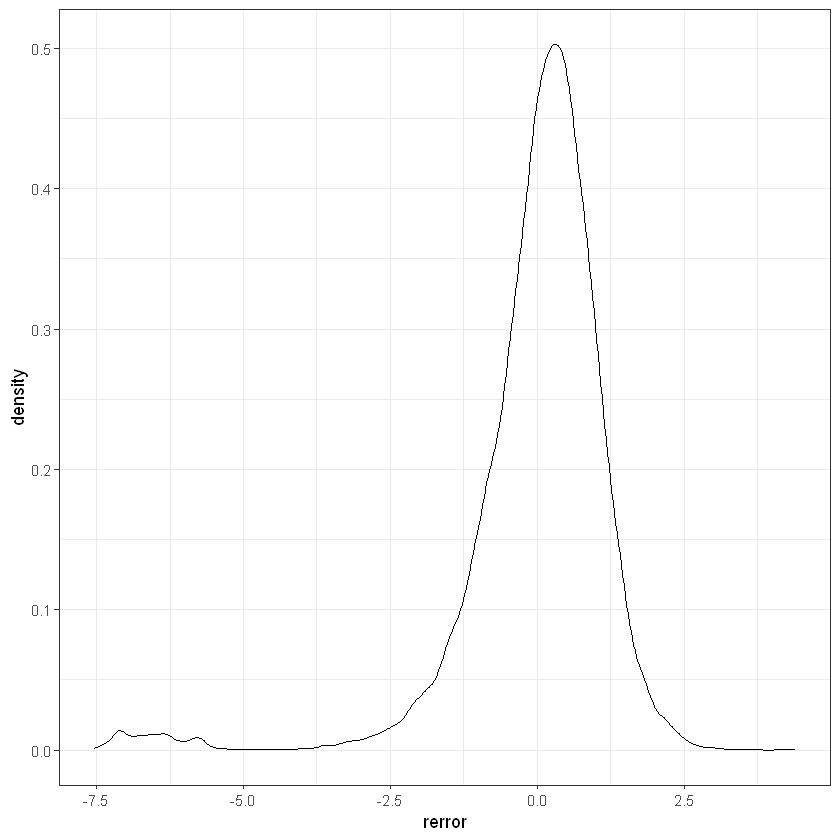

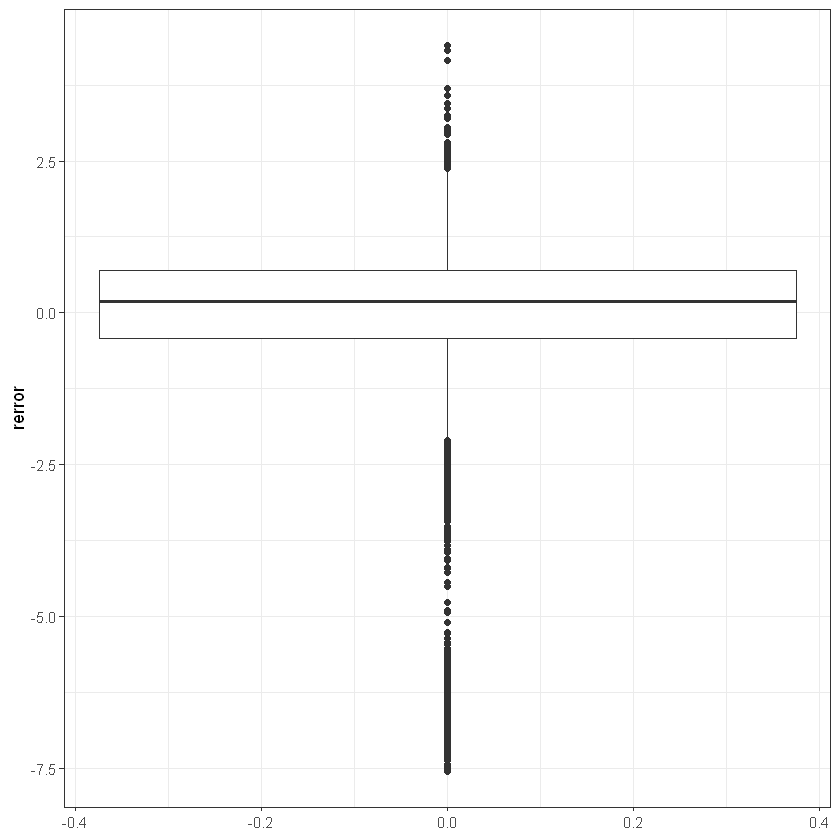

In [8]:
# Residuos 
base$rerror <- m2$resid

(
ggplot(base, aes(x=rerror)) + geom_density() + theme_bw()
)


(
ggplot(base, aes(y=rerror)) + geom_boxplot(outliers = FALSE) + theme_bw()
)

In [20]:
base$rerrorsq <- (base$rerror)^2
m2_error <- lm(rerrorsq ~ reduca + rmujer + redad + redadsq + rpareja, data = base)
stargazer(m2_error , title="Results", type="text", keep = c("reduca", "rmujer", "redad", "redadsq", "rpareja"))



Results
                        Dependent variable:    
                    ---------------------------
                             rerrorsq          
-----------------------------------------------
reduca                        0.016**          
                              (0.007)          
                                               
rmujer                       1.260***          
                              (0.100)          
                                               
redad                        -0.090***         
                              (0.023)          
                                               
redadsq                      0.001***          
                             (0.0002)          
                                               
rpareja                      1.263***          
                              (0.095)          
                                               
-----------------------------------------------
Observations                  2

# Question 2

In [9]:
# Can easily match Stata's robust standard errors
#m4 <- lm_robust(lnr6 ~ reduca + rmujer + redad + redadsq + rpareja, data = base, se_type = "stata")
#m4 <- lmRob(lnr6 ~ reduca + rmujer + redad + redadsq + rpareja, data = base)
m4 <- rlm(lnr6 ~ reduca + rmujer + redad + redadsq + rpareja, data = base)
summary(m4)


Call: rlm(formula = lnr6 ~ reduca + rmujer + redad + redadsq + rpareja, 
    data = base)
Residuals:
    Min      1Q  Median      3Q     Max 
-7.6730 -0.5528  0.0495  0.5535  4.2542 

Coefficients:
            Value    Std. Error t value 
(Intercept)   4.6980   0.0802    58.5598
reduca        0.0719   0.0010    69.7944
rmujer       -0.3997   0.0152   -26.2671
redad         0.0812   0.0035    23.1933
redadsq      -0.0009   0.0000   -24.9429
rpareja       0.0265   0.0145     1.8330

Residual standard error: 0.8203 on 24768 degrees of freedom

In [13]:
stargazer(m2 , m4 , title="Results", type="text", keep = c("reduca", "rmujer", "redad", "redadsq", "rpareja"))


Results
                                         Dependent variable:         
                                 ------------------------------------
                                                 lnr6                
                                            OLS              robust  
                                                             linear  
                                            (1)                (2)   
---------------------------------------------------------------------
reduca                                    0.071***          0.072*** 
                                          (0.001)            (0.001) 
                                                                     
rmujer                                   -0.560***          -0.400***
                                          (0.022)            (0.015) 
                                                                     
redad                                     0.095***          0.081*** 
           

# Question 3

In [34]:
stargazer( m4 , title="Results", type="text", keep = c("reduca", "rmujer", "redad", "redadsq", "rpareja"))


Results
                        Dependent variable:    
                    ---------------------------
                               lnr6            
-----------------------------------------------
reduca                       0.072***          
                              (0.001)          
                                               
rmujer                       -0.400***         
                              (0.015)          
                                               
redad                        0.081***          
                              (0.004)          
                                               
redadsq                      -0.001***         
                             (0.00004)         
                                               
rpareja                       0.027*           
                              (0.014)          
                                               
-----------------------------------------------
Observations                  2

$$
redad_{ss} = \hat{\bigtriangleup} =\frac{\hat{\beta}_{2}}{-2 \hat{\beta}_{3}}
$$

In [25]:
vcov(m4)

,(Intercept),reduca,rmujer,redad,redadsq,rpareja
(Intercept),6.436164e-03,-1.528876e-05,-1.367136e-04,-2.704724e-04,2.794784e-06,-1.362757e-04
reduca,-1.528876e-05,1.062048e-06,4.061936e-07,1.823215e-07,-1.307526e-09,6.866932e-07
rmujer,-1.367136e-04,4.061936e-07,2.315133e-04,-1.220847e-06,1.791972e-08,1.262901e-04
redad,-2.704724e-04,1.823215e-07,-1.220847e-06,1.225761e-05,-1.298871e-07,-2.517709e-06
redadsq,2.794784e-06,-1.307526e-09,1.791972e-08,-1.298871e-07,1.402471e-09,3.204463e-08
rpareja,-1.362757e-04,6.866932e-07,1.262901e-04,-2.517709e-06,3.204463e-08,2.094902e-04


In [27]:
vcov(m4)[5,5]

[1] 1.402471e-09



$$ Var \left( \hat{\bigtriangleup}\right) = \left( \frac{\partial \hat{\bigtriangleup}}{\partial \hat{\gamma}}_{2} \right)^{2} Var \left( \hat{\gamma}_{2}\right) + \left( \frac{\partial \hat{\bigtriangleup}}{\partial \hat{\gamma}}_{3} \right)^{2}  Var \left( \hat{\gamma}_{3}\right)  + 2 \left( \frac{\partial \hat{\bigtriangleup}}{\partial \hat{\gamma}}_{2} \right) \left( \frac{\partial \hat{\bigtriangleup}}{\partial \hat{\gamma}}_{3} \right) Cov \left(\hat{\gamma}_{2}, \hat{\gamma}_{3} \right) $$



In [47]:
# Parametros del metodo delta

beta2 <- -(1/(2*m4$coefficients['redadsq']))
beta3 <- (m4$coefficients['redad'])/(2*(m4$coefficients['redadsq']^2))
beta2_sq <- beta2^2
beta3_sq <- beta3^2

var_beta2       = vcov(m4)[4,4]
var_beta3       = vcov(m4)[5,5]
cov_beta2_beta3 = vcov(m4)[4,5]

var_delta = (beta2_sq*var_beta2) + (beta3_sq*var_beta3) + (2*beta2*beta3*cov_beta2_beta3)
var_delta

redadsq 
0.07840357

In [46]:
se_delta = sqrt(var_delta)
se_delta

redadsq 
0.2800064

# Question 4

In [16]:
base   <- base %>% mutate(i1 = rmujer * reduca )
base_m <- base %>% filter(rmujer ==0) # male
base_f <- base %>% filter(rmujer ==1) # female 

m2_m <- rlm(lnr6 ~ reduca + redad + redadsq + rpareja, data = base_m)
m2_f <- rlm(lnr6 ~ reduca + redad + redadsq + rpareja, data = base_f) 
m5   <- rlm(lnr6 ~ reduca + i1 + rmujer + redad + redadsq + rpareja, data = base)

In [19]:
stargazer(m2_m, m2_f, m5 , title="Results", type="text", 
          keep = c("reduca", "i1"), 
          dep.var.labels=c("Modelo Lineal : OLS robust"), 
          column.labels=c("Male","Female", "Interaction"))


Results
                                      Dependent variable:                  
                    -------------------------------------------------------
                                  Modelo Lineal : OLS robust               
                           Male             Female          Interaction    
                           (1)                (2)               (3)        
---------------------------------------------------------------------------
reduca                   0.070***          0.078***           0.070***     
                         (0.001)            (0.002)           (0.001)      
                                                                           
i1                                                            0.008***     
                                                              (0.002)      
                                                                           
---------------------------------------------------------------------------
Obs